In [5]:
import random
import string
import numpy as np
from math import e
from statistics import mode, mean
from py_linq import Enumerable
import time
import pylab as pl





epocas=0
numCiudades=5
numPoblacion=100
generaciones=100000
Q=0.905
resumen=generaciones/15
muestra=generaciones/10


ciudades=["Campeche", "Cancun", "chetumal", "chichenitza", 'izamal','playa del carmen','puerto morales','merida','tizimni','TUlum','uxmal',"Valladolid"]

#Genes posibles
asci=string.ascii_uppercase
letras=[]
for i in range(numCiudades):
    letras.append(asci[i])

#Distancias
dis=[
    ['A', [0, 515, 425, 315, 265, 583, 551, 196, 409, 470, 171, 355]],#Campeche
    ['B',[512, 0, 382, 205, 266, 68, 36, 320, 212, 131, 399, 160]], # cancunn
    ['C',[425, 382, 0, 410, 471, 314, 346, 525, 417, 251, 605, 365]],# chetumal, 
    ['D',[315, 205, 410, 0, 62, 273, 241, 115, 97, 159, 199, 41]],#chichenitza
    ['E',[265, 266, 471, 62, 0, 334, 302, 72, 159, 220, 149, 106]],#izamal
    ['F',[583, 68, 314, 273, 334, 0, 32, 388, 279, 63, 468, 228]],#playa del carmen
    ['G',[551, 36, 346, 241, 302, 32, 0, 256, 297, 95, 435, 195]],# puerto morales
    ['H',[196, 320, 525, 115, 72, 388, 256, 0, 212, 274, 80, 160]],#merida
    ['I',[409, 212, 417, 97, 159, 279, 297, 212, 0, 166, 291, 52]],#tizimni
    ['J',[470, 131, 251, 159, 220, 63, 95, 274, 166, 0, 366, 291]],#TUlum
    ['K',[171, 399, 605, 199, 149, 468, 435, 80, 291, 366, 0, 239]],#uxmal
    ['L',[355, 160, 365, 41, 106, 228, 195, 160, 52, 291, 239, 0]]#Valladolid
     ]


In [2]:

def CalculoFitness(individuo):
    suma=0
    #Calculamos la distancia entre ciudades
    for i in range(len(individuo)-1):
        actual=string.ascii_uppercase.index(individuo[i])
        sig=string.ascii_uppercase.index(individuo[i+1])
        suma+=dis[actual][1][sig]
    #calculamos la distancia a la ciudad de origen
    actual=string.ascii_uppercase.index(individuo[numCiudades-1])
    sig=string.ascii_uppercase.index(individuo[0])
        
    return suma+dis[actual][1][sig]
    
def CalculoProbSelec (num, fitness):
    x= 1 - ((fitness[num] - min(fitness))/max(fitness) )
    return x

def Mutacion(padre):
    for j in range(len(padre)):
        
        if random.random()>Q:#Si es mayor mutamos
            if j+1==len(padre):#si es la ultima ciudad lo cambiamos con el primero
                aux=padre[0]
                padre[0]=padre[j]
                padre[j]=aux
            else:
                aux=padre[j+1]
                padre[j+1]=padre[j]
                padre[j]=aux                        
       
    return padre

def lectura (mejor):
    ruta=[]
    for i in range (numCiudades):
        a=string.ascii_uppercase.index(mejor[i])
        ruta.append(ciudades[a])

    return ruta


In [3]:

poblacion=[]
fitnes=[]
Mejor_historico=[]

#CABECERA
print("NTOWN: ", numCiudades, "Poblacion total: ", numPoblacion, "NGEN: ", generaciones, "Q: ", Q)

#Generamos la poblacion inicial aleatoria
for i in range(numPoblacion):
    frase=[]
    opciones=[]
    for i in range(numCiudades):
        opciones.append(asci[i])
    for j in range(numCiudades):
        elegida=random.choice(opciones)#Ciudad elegida
        frase.append(elegida)
        n=opciones.index(elegida)
        #la quitamos de la lista para no volver a la misma ciudad en la misma ruta
        if j!=numCiudades:
            opciones.pop(n)
    poblacion.append(frase)


pob=Enumerable(poblacion)#TRANSFORMAMOS POBLACION EN ENUMERABLE PARA PODER USAR LINQ
fitnes=pob.select(lambda x: CalculoFitness(x))
fitnes=np.array(fitnes)
while True:
        
    #Seleccion del padre
    aleatorio=random.randint(0,numPoblacion-1)
    Padre=empieza=aleatorio
    Flag=False #False = aleatorio --> final, True = 0 --> aleatorio
    numero=0
    
    while Flag==False or Padre<=(empieza-1):
        
        
        numero=random.random()

        prb=CalculoProbSelec(Padre, fitnes)
        
        #si es menor, se replica
        if numero<prb:
            #Sustituimos uno aleatorio
            aleatorio=random.randint(0,numPoblacion-1)
            #Mutamos al cromosoma del padre
            poblacion[aleatorio]=Mutacion(poblacion[Padre])
            #calculamos su fitnes
            fitnes[aleatorio]=CalculoFitness(poblacion[aleatorio])
            
        if Padre==numPoblacion-1:
            Padre=0
            Flag=True
        Padre+=1


    #comprobamos si alguno de los que hemos obtenido es mejor solución
    pob=Enumerable(poblacion)#TRANSFORMAMOS POBLACION EN ENUMERABLE PARA PODER USAR LINQ
    menorFitnes=pob.min(lambda x: CalculoFitness(x))
    mejor=pob.where(lambda x: CalculoFitness(x)==menorFitnes).take(1)#obtenemos el mejor individuo
    
    if epocas==0:
            Mejor_historico=mejor[0]
    elif CalculoFitness(mejor[0]) < CalculoFitness(Mejor_historico):
        Mejor_historico=mejor[0]
  
    if epocas%resumen == 0 or epocas%muestra==0:
        
        
        
        #menorFitnes=pob.min(lambda x: CalculoFitness(x))
        mayorFitnes=pob.max(lambda x: CalculoFitness(x))
        mediaFitness=pob.avg(lambda x: CalculoFitness(x))
        aparece=pob.count(lambda x: CalculoFitness(x)==menorFitnes)#comparamos entre todos los individuos para saber cuales son igual que el mejor
        
        #individuo de consenso
        consenso=[]
        for i in range(numCiudades):
            posicion=[]
            for j in range(numPoblacion):
                posicion.append(poblacion[j][i])
            consenso.append((mode(posicion)))
        
        print("\n\nGeneracion nº: ", epocas)
        print("Distancias: \nMedia: ", mediaFitness, "Minima: ", menorFitnes, "Mayor: ", mayorFitnes)       
        print("Mejor individuo: ", lectura(mejor[0]), " %BEST (",(aparece/numPoblacion)*100, "%)")
        print('Individuo de consenso: ', consenso)


        

        if epocas%muestra==0:
            print("Muestreo de la poblacion: ")
            print(pob.take(round(numPoblacion*0.2)))
        
        
        
        

    
    if epocas == generaciones:
        print("La mejor ruta que ha encontrado el algoritmo es: ", lectura(Mejor_historico))
        print("Con una distancia de total de: ", CalculoFitness(Mejor_historico))
        break
    epocas+=1
    





NTOWN:  5 Poblacion total:  100 NGEN:  100000 Q:  0.905


Generacion nº:  0
Distancias: 
Media:  1647.34 Minima:  1339 Mayor:  1977
Mejor individuo:  ['chichenitza', 'Cancun', 'chetumal', 'Campeche', 'izamal']  %BEST ( 10.0 %)
Individuo de consenso:  ['B', 'D', 'E', 'A', 'E']
Muestreo de la poblacion: 
[['D', 'C', 'A', 'B', 'E'], ['B', 'C', 'D', 'A', 'E'], ['C', 'B', 'E', 'A', 'D'], ['C', 'D', 'A', 'B', 'E'], ['C', 'E', 'B', 'D', 'A'], ['C', 'B', 'A', 'E', 'D'], ['E', 'D', 'A', 'C', 'B'], ['C', 'B', 'E', 'A', 'D'], ['E', 'C', 'D', 'B', 'A'], ['B', 'C', 'D', 'E', 'A'], ['A', 'D', 'E', 'C', 'B'], ['A', 'C', 'D', 'E', 'B'], ['D', 'C', 'E', 'A', 'B'], ['B', 'C', 'A', 'D', 'E'], ['D', 'E', 'C', 'A', 'B'], ['B', 'D', 'E', 'C', 'A'], ['C', 'B', 'A', 'E', 'D'], ['B', 'D', 'C', 'E', 'A'], ['D', 'C', 'B', 'A', 'E'], ['C', 'E', 'B', 'D', 'A']]


Generacion nº:  10000
Distancias: 
Media:  1678.0 Minima:  1678 Mayor:  1678
Mejor individuo:  ['chetumal', 'Campeche', 'Cancun', 'chichenitza', 'izamal'

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


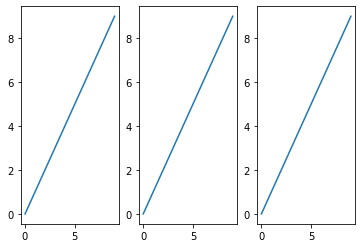

In [12]:
x = range(10)
y = range(10)

fig,ax=pl.subplots(1,3)
print(ax)
#for row in ax:
for col in ax:
    col.plot(x,y)
pl.show()